# Assignment 4: Word Embedding Network
In this assignment you will practice how to create a Word Embedding Network in Tensorflow 2.0. First, you will finish some functions to parse the data, build the corpus and construct the skip pair. Then, you will construct a word embedding network by follow the specific requirements and architectures. Finally, you will train the network and visualize the result.

In [55]:
import operator
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization
from tensorflow.keras import Model

# split_sentence
1. Remove the special characters from the sentence
2. Filter the short sentence

You can rewrite this function or add more filter conditions

In [56]:
def split_sentence(sentences):
    new_sentence = list()
    for sentence in sentences:
        sentence = sentence.replace("\n", " ")
        sentence = sentence.replace(",", "")
        sentence = sentence.replace("\'", " ")
        sentence = sentence.replace("?", "")
        sentence = sentence.replace("!", "")
        sentence = sentence.replace(";", "")
        
        
        
        sentence = sentence.lower()
        if sentence.count(" ") <= 3:
            continue
        new_sentence.append(sentence)
    return new_sentence

Extract all the sentences from the input file. Split the input into each sentence by calling the "split_sentence" function.

- test_doc_short: Small dataset. You can use it to debug your code.

- test_doc_long: Large dataet. You should use it to get the final result.

In [57]:
file = open("test_doc_long.txt",'r')
raw_data_1 = file.read()
file.close()
sentences = raw_data_1.split(".")
print (len(sentences))
corpus_raw = list()                  
corpus_raw = split_sentence(sentences)
print (corpus_raw[:3])

698
[' dursley of number four privet drive were proud to say that they were perfectly normal thank you very much', ' they were the last people you d expect to be involved in anything strange or mysterious because they just didn t hold with such nonsense', ' dursley was the director of a firm called grunnings which made drills']


# build_dictionary (10 points)
1. Extract the word from the input. 
2. Build a non-duplicate word dictionary.

In [58]:
def build_dictionary(corpus_raw):
    words = []
    # TO DO
    for wordblock in corpus_raw:
        # split each sentences
        #corpus_raw
        for singleword in wordblock.split():
            if singleword not in words:
                words.append(singleword)

    # END TO DO
    return set(words)

In [59]:
corpus_dict = build_dictionary(corpus_raw)

- The number of word in "test_doc_long" dataset is around 7.
- The number of word in "test_doc_long" dataset is around 1831.

In [60]:
print (len(corpus_dict))

1831


# one_hot_encoding (10 points)
1. Every word is represented as a vector containing 1 at its position in the vocabulary.

In [61]:
def one_hot_encoding(data_point_index, vocab_size):
    # TO DO
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    


    # END TO DO
    return temp

# build_word_index_mapping (10 points)
1. Given a word, the function should return the index of this word in dictionary.
2. Given an index, the function should retrieve the word.

In [62]:
def build_word_index_mapping(corpus_dict):   
    # TO DO
    
    word_2_ind = {}
    ind_2_word = {}
    # get the total number of unique words
    #vocab_size = len(corpus_dict)
    
    # loop the dict and index/key each element
    for i,word in enumerate(corpus_dict):
        word_2_ind[word] = i
        ind_2_word[i] = word


    # END TO DO
    return word_2_ind, ind_2_word

In [63]:
word_2_ind, ind_2_word = build_word_index_mapping(corpus_dict)

Example Output:
    
1831
1831
1504

In [64]:
print (len(word_2_ind))
print (len(ind_2_word))
print (word_2_ind['he'])

1831
1831
70


In [65]:
sentences = corpus_raw

In [66]:
print(sentences[:3])

[' dursley of number four privet drive were proud to say that they were perfectly normal thank you very much', ' they were the last people you d expect to be involved in anything strange or mysterious because they just didn t hold with such nonsense', ' dursley was the director of a firm called grunnings which made drills']


In [67]:
WINDOW_SIZE = 2

# build_skip_pair (10 points)
1. Build the word pair with given window size.

In [68]:
def build_skip_pair(window_size, sentences):
    # TO DO
    data = []
    
    # split the sentences into sentence
    sentences_list = []
    for single_sentence in sentences:
        sentences_list.append(single_sentence.split())
    
    # loop the sentence list
    for sentence in sentences_list:
        for word_index, word in enumerate(sentence):
            # pair each word basing on the word window with the current word
            for pair_word in sentence[max(word_index - window_size, 0) : min(word_index + window_size, len(sentence)) + 1] : 
                # prevent duplicate
                if pair_word != word:
                    data.append([word,pair_word])

    # END TO DO
    return data

Example Input:

He is the king .

Example Output: 

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king']]

In [69]:
data = build_skip_pair(WINDOW_SIZE, sentences)
print (len(data))
print (data[:5])

31614
[['dursley', 'of'], ['dursley', 'number'], ['of', 'dursley'], ['of', 'number'], ['of', 'four']]


# build_train_data_label
1. Iterate all the word pairs in data
2. Construct the train and label data

In [70]:
def build_train_data_label(data, word_2_ind, vocab_size):
    x_train = [] 
    y_train = [] 
    for data_word in data:
        x_train.append(one_hot_encoding(word_2_ind[ data_word[0] ], vocab_size))
        y_train.append(one_hot_encoding(word_2_ind[ data_word[1] ], vocab_size))
    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    return x_train, y_train

In [71]:
x_train, y_train = build_train_data_label(data, word_2_ind, len(corpus_dict))

Preprocess the dataset with batch size 8.

In [72]:
print(x_train.shape, y_train.shape)

dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))

dataset = dataset.shuffle(100).batch(8)


(31614, 1831) (31614, 1831)


# MyEmbeddingModel (20 points)
1. init: Define all the layers you will use in the embedding network.
2. call: Define the network layer connectivity:
           - Fully connected with embedding_size/2 hidden neurons
           - Batchnormalization (optional)
           - Relu activation (optional)
           - Fully connected with embedding_size hidden neurons (This should be the word embedding output)
           - Batchnormalization (optional)
           - Relu activation (optional)
           - Fully connected that map to vocab_size output classes
           - Softmax (This should be the classification output)

In [73]:
class MyEmbeddingModel(Model):
  def __init__(self, embedding_size, vocab_size):
    super(MyEmbeddingModel, self).__init__()
    #Example:
        #self.d2 = Dense(embedding_size)
        #self.d3 = Dense(vocab_size, activation = 'softmax')
    
    # TO DO
    #self.conv1 = Conv2D(64, vocab_size, activation='relu')
    #self.flatten = Flatten()
    self.d1 = Dense(embedding_size/2, activation = 'relu')
    self.d2 = Dense(embedding_size, activation = 'relu')
    self.d3 = Dense(vocab_size, activation = 'softmax')
    
    #self.x = tf.Variable(tf.ones(shape=(None, vocab_size)),dtype=tf.float32)
    #self.y_label = Variable(tf.ones(shape=(None, vocab_size)),dtype=tf.float32)
    #self.W1 = tf.Variable(tf.random_normal([vocab_size, embedding_size]))
    #self.b1 = tf.Variable(tf.random_normal([embedding_size])) #bias
    #self.W2 = tf.Variable(tf.random_normal([embedding_size, vocab_size]))
    #self.b2 = tf.Variable(tf.random_normal([vocab_size]))

    # END TO DO

  def call(self, x):
    #Example:
        #x_2 = self.d2(x_1)
        #x_3 = self.d3(x_2)
        
    x_1 = self.d1(x)
    x_2 = self.d2(x_1)
    x_3 = self.d3(x_2)
        
    #x_2 = self.d2(x)
    #x_3 = self.d3(x_2)        
        
    #x_2 = tf.add(tf.matmul(x,W1), b1)
    #x_3 = tf.nn.softmax(tf.add( tf.matmul(x_2, W2), b2))    
    # TO DO



    # END TO DO
    return x_2, x_3 

In [74]:
embedding_size = 300
vocab_size = len(corpus_dict)
model = MyEmbeddingModel(embedding_size, vocab_size)
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

# Optimizer (10 points)
- Implement the SGD optimizer
- Implement the RMSprop optimizer
- Implement the Adagrad optimizer
- Implement the Adadelta optimizer
- Implement the Adam optimizer (Use the Adam optimizer for training)

In [75]:
# Example: optimizer = tf.keras.optimizers.Adamax()
# optimizer = #SGD optimizer
# optimizer = #RMSprop optimizer
# optimizer = #Adagrad optimizer
# optimizer = #Adadelta optimizer
#optimizer = tf.keras.optimizers.Adadelta()
#optimizer = #Adam optimizer
optimizer = tf.keras.optimizers.Adamax()

Define the training step. Calculate the loss and optimize the weights.

In [76]:
@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:

        _, predictions = model(inputs, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss = tf.reduce_mean(loss)

    return train_loss, labels, predictions

Example Output:

    Epoch 0, Loss: 6.393890857696533
    Epoch 1, Loss: 5.391612529754639
    Epoch 2, Loss: 4.996224403381348
    Epoch 3, Loss: 4.692948341369629
    Epoch 4, Loss: 4.473527908325195
    Epoch 5, Loss: 4.335629940032959
    Epoch 6, Loss: 4.251341342926025
    Epoch 7, Loss: 4.205460071563721
    Epoch 8, Loss: 4.172143936157227
    Epoch 9, Loss: 4.1499714851379395
    Epoch 10, Loss: 4.129685878753662
    ......

In [77]:
EPOCHS = 50

for epoch in range(EPOCHS):
    batch_loss = 0.0
    num_batch = 0
    for (batch, (inputs, labels)) in enumerate(dataset):
        train_loss, labels, predictions = train_step(inputs, labels)
        batch_loss += train_loss
        num_batch += 1
    template = 'Epoch {}, Loss: {}'
    print(template.format(epoch, batch_loss/num_batch))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 0, Loss: 6.604045391082764
Epoch 1, Loss: 5.937309741973877
Epoch 2, Loss: 5.81044340133667
Epoch 3, Loss: 5.69716739654541
Epoch 4, Loss: 5.61476993560791
Epoch 5, Loss: 5.54210090637207
Epoch 6, Loss: 5.490908145904541
Epoch 7, Loss: 5.442967414855957
Epoch 8, Loss: 5.39976167678833
Epoch 9, Loss: 5.355835437774658
Epoch 10, Loss: 5.313259124755859
Epoch 11, Loss: 5.269674777984619
Epoch 12, Loss: 5.2245073318481445
Epoch 13, Loss: 5.178468704223633
Epoch 14, Loss: 5.128381252288818
Epoch 15, Lo

# build_embedding_dict (10 points)
1. Iterate the corpus_dict and generate the embedding for each word.
2. Use the trained model to generate the word embedding with given one-hot embedding word.
3. Store the word and embedding in a dictionary. The key should be the word. The value should be the embedding vector.

In [78]:
def build_embedding_dict(model, corpus_dict):
    embeddings = dict()
    # TO DO
    dict_len = len(corpus_dict)
    for word_index, word in enumerate(corpus_dict):
        # extract the embedding word list and convert into array
        temp = []
        embedding_word = one_hot_encoding(word_2_ind[ word ],dict_len)
        #print(temp)
        temp.append(embedding_word)
        embedding_arr = np.asarray(temp)
        
        sample_embedding, _ = model(embedding_arr, training=False)
        #_, _ = model(one_hot_encoding(word_index,dict_len),dict_len)
        embeddings[word] = sample_embedding[0]
        
    # END TO DO
    return embeddings

# euclidean_dist_np (10 points)
1. Calculate the Euclidean distance between two input vectors.

In [79]:
def euclidean_dist_np(vec1, vec2):
    dist = 0.0
    # TO DO
    
    #print(vec1.shape)
    #print(vec2.shape)
    
    #dist = numpy.linalg.norm(vect1-vect2)
    dist = np.sqrt(np.sum((vec1-vec2)**2))

    # END TO DO
    return dist

# find_closest (10 points)
1. Calculate the euclidean distance between the given word and all the words in embedding dictionary.
2. Sort the dictionary by value in ascending order.
3. Return the first three closet words.

In [96]:
def find_closest(word, embeddings):
    result = dict()
    # TO DO
    
    # extrract the word index and convert into a vector
    word_id = word_2_ind[word]
    
    word_index = np.array([word_id])
    
    # print(word_index)
    
    # retrieve the index array related to the word
    query_embedding = embeddings[word]
    
    # loop each embedded word to calculate the distance
    
    for index, embedding in enumerate(embeddings):
        #embedding_index = np.array([word_2_ind[embedding]])
        #dist = euclidean_dist_np(word_index, embedding_index)
        
        # calculate the distance
        dist = euclidean_dist_np(query_embedding, embeddings[embedding])
        result[embedding] = dist
    
    # sort the result
    result_list = sorted(result.items(), key=lambda x: x[1], reverse=False)
    

    # END TO DO
    return result_list[:3]

Example Output: 

[('she', 0.0), ('he', 5.3993783), ('they', 5.7223315)]

In [97]:
embedding_dict = build_embedding_dict(model, corpus_dict)
print(find_closest('she', embedding_dict))

[('she', 0.0), ('her', 2.1377487), ('at', 2.2346663)]


# visualize_cluster
1. Visualize the word embedding in 2D space

In [94]:
def visualize_cluster(embedding_dict): 
    labels = []
    tokens = []
    for w in embedding_dict.keys():
        labels.append(w)
        tokens.append(embedding_dict[w])
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                         xy=(x[i], y[i]),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')
    plt.show()

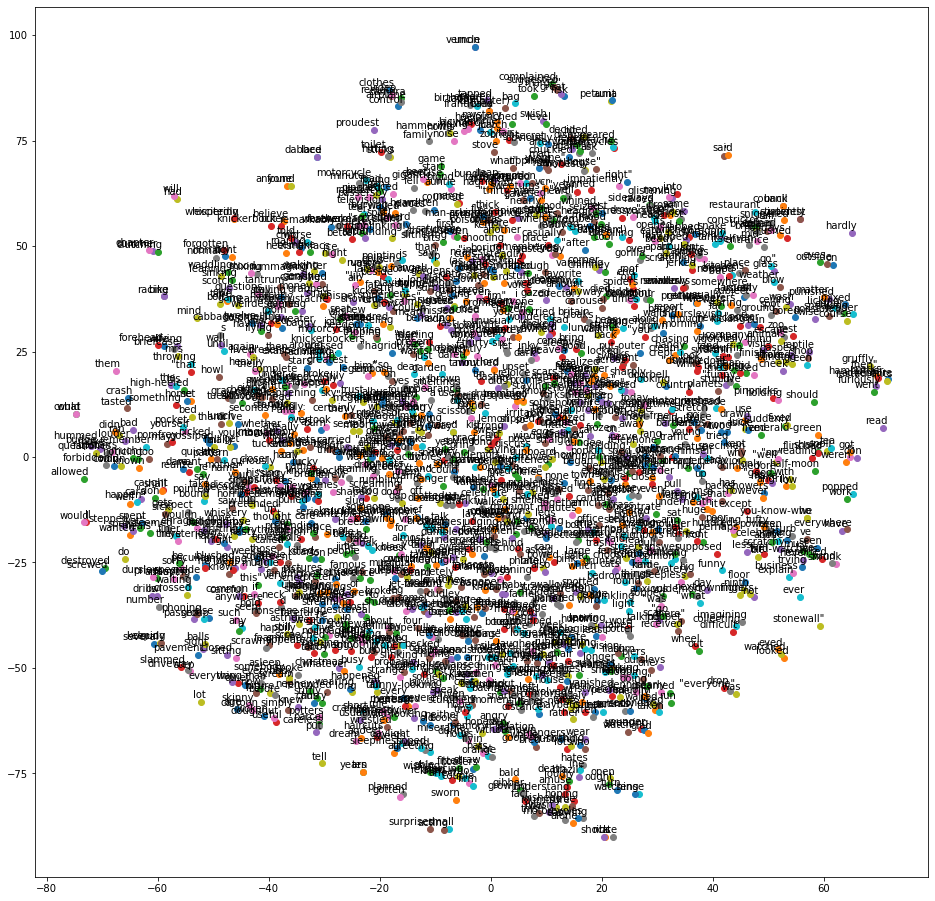

In [95]:
visualize_cluster(embedding_dict)